
# **Problem Statement**


## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. 
## The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

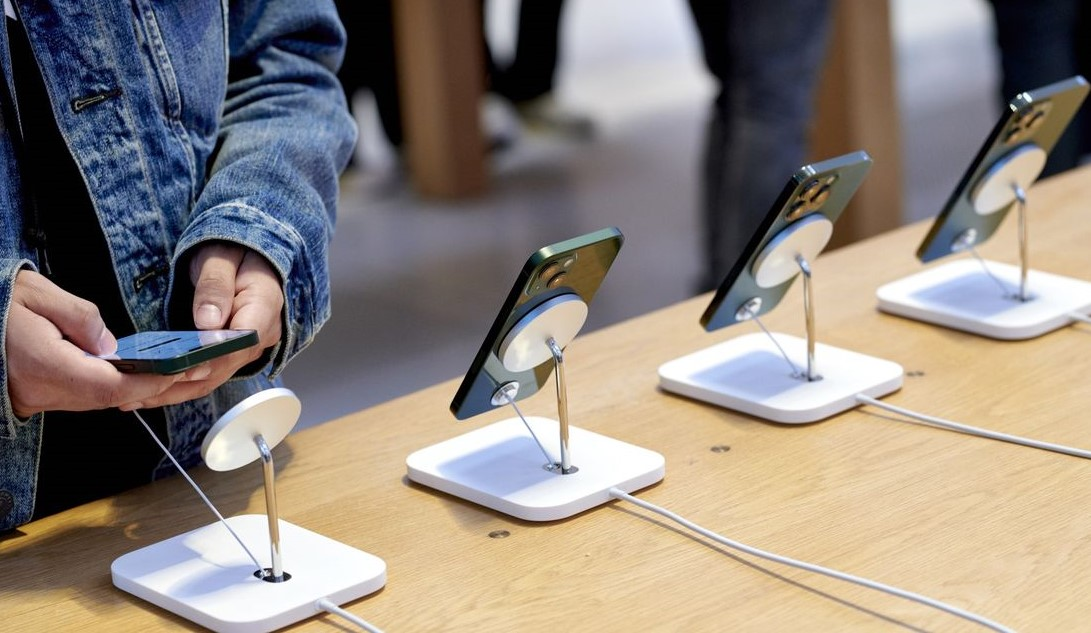

# **Data Description**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [45]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
%matplotlib inline
import scipy.stats as scp
# import warning 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# load dataset
data = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# creating a copy of data
df = data.copy()

In [53]:
# checking first 5 row
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [54]:
# last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [55]:
# checking some random rows
df.sample(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
362,1976,1,0.7,1,4,0,32,0.8,171,2,...,1301,1922,3699,17,11,13,0,1,1,3
1479,1806,1,2.0,1,2,1,54,0.1,117,1,...,347,727,3142,13,0,6,1,0,1,3
318,508,0,0.8,0,7,1,42,0.3,94,1,...,39,557,663,13,12,7,1,0,0,0


In [56]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [57]:
# descriptive summary of data
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [58]:
# checking shape  of dataset
df.shape

(2000, 21)

In [59]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Preprocesing the data**

**Null values**

In [60]:
# checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Duplicate values**

In [61]:
#checking duplicate data
df.duplicated().sum()

0

There's no null and duplicate values. 

In [62]:
#checking no. of unique value in each feature column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [63]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [64]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [65]:
print(categorical_columns)

['blue', 'dual_sim', 'wifi', 'four_g', 'price_range', 'touch_screen', 'three_g']


**Checking outliers**

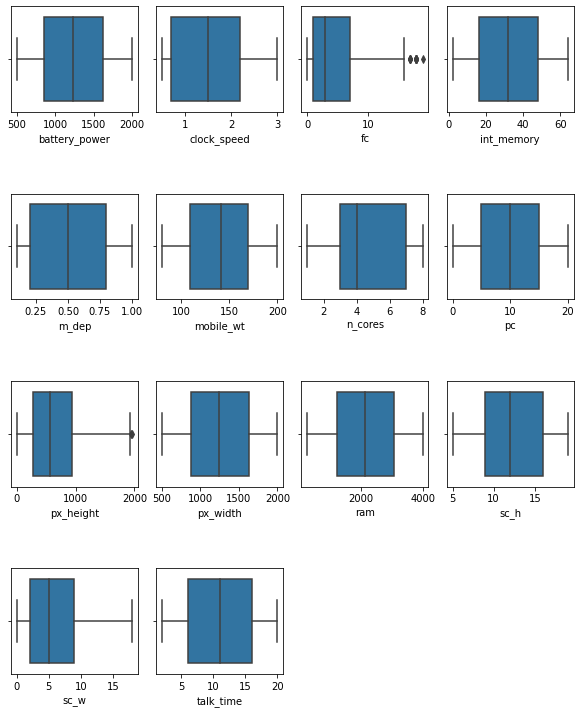

In [66]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

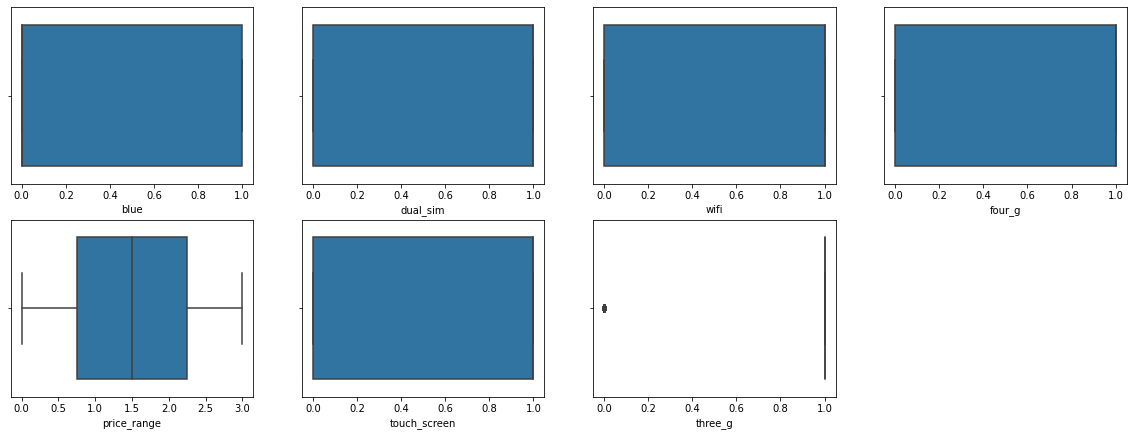

In [67]:
columns = categorical_columns
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i])

There seems to be no outliers.

# **Univariate Analysis**

Text(0.5, 1.0, 'Price Range')

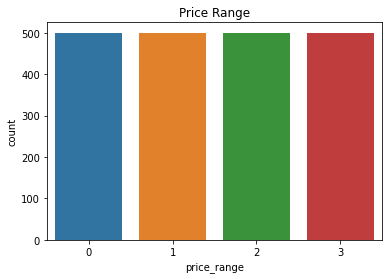

In [68]:
#mobile_df['price_range'].value_counts()
sns.countplot(df['price_range']).set_title("Price Range")

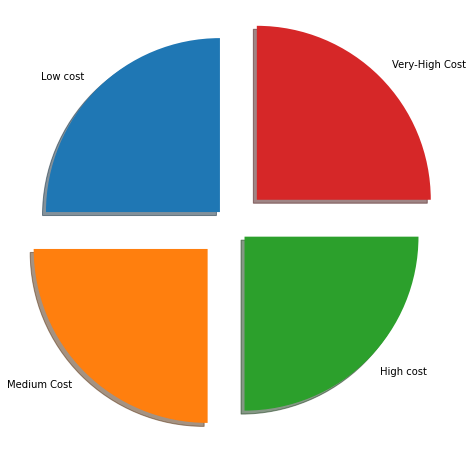

In [69]:
# making a prie chart 

price_labels = ['Low cost' , 'Medium Cost' , 'High cost' , 'Very-High Cost']
data = df['price_range'].value_counts()

# Creating the plot
fig = plt.figure(figsize=(10,8))
plt.pie(data, labels = price_labels, explode = (0.1,0.2,0.1,0.2), shadow=True, startangle= 90)
plt.show()

Price Range columns label(dependent variable) is equally distrubuted in 4 categories. 

0 -  low cost, 1 - medium cost, 2 - high cost, 3 - very high cost

# **Data Distribution**

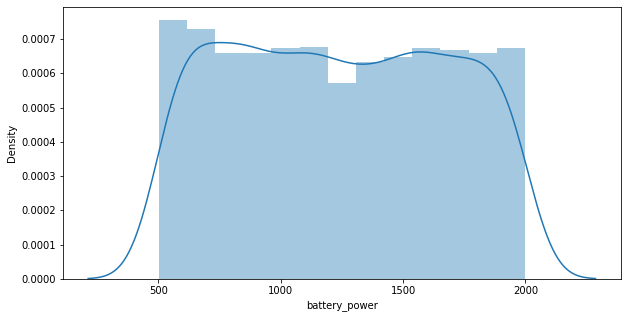

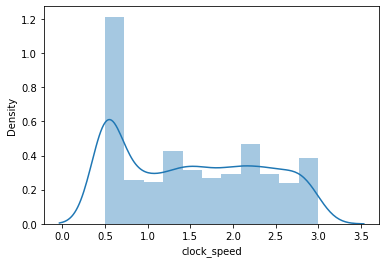

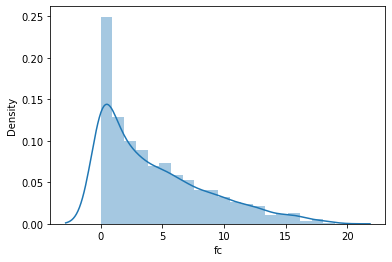

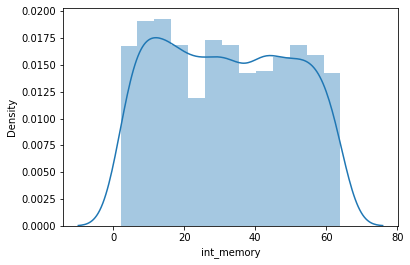

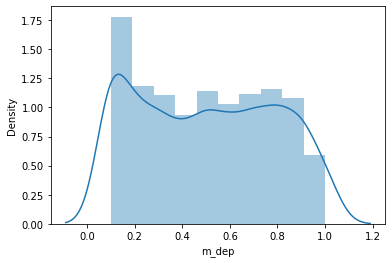

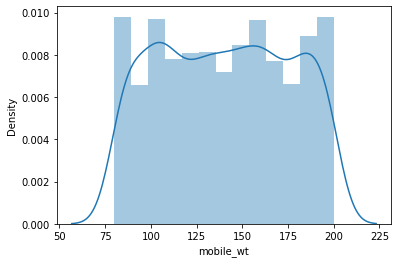

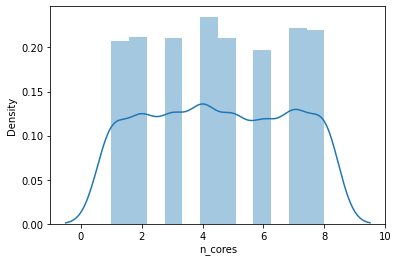

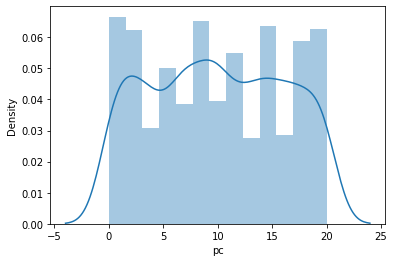

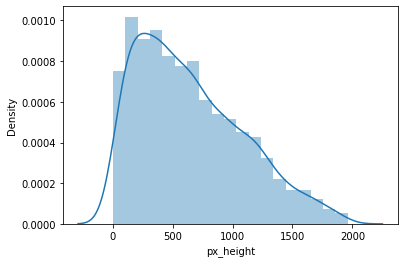

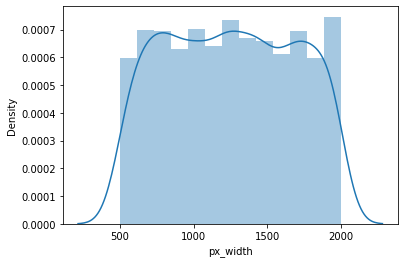

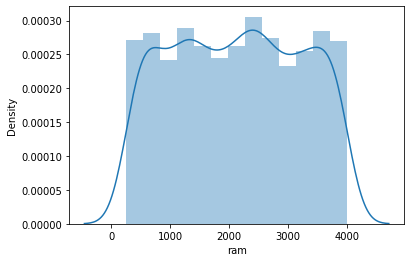

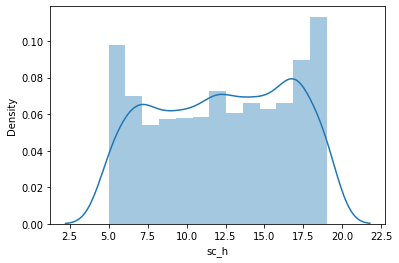

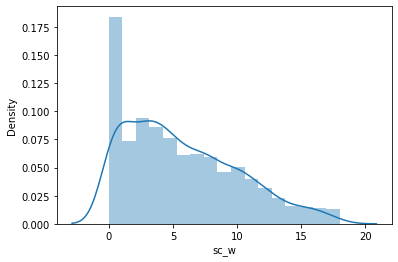

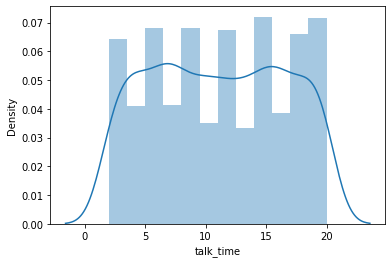

In [70]:
# checking data distribution of numerical columns
fig = plt.figure(figsize=(10,5))
n= 1
for i in numerical_columns:
  n= n+1
  sns.distplot(df[i],kde=True)
  plt.show()  

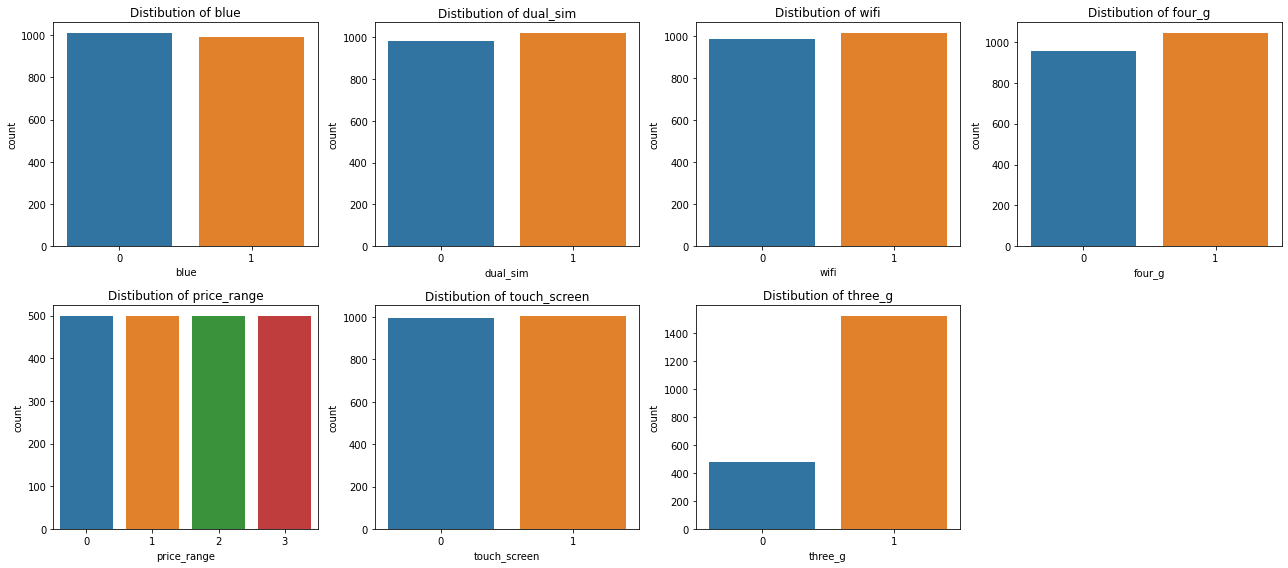

In [71]:
# checking data distribution in categorical columns 
fig = plt.figure(figsize=(18,8))
c=1
for i in categorical_columns:
  plt.subplot(2,4, c)
  sns.countplot(df[i])
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3045882d50>,
      dtype=object)

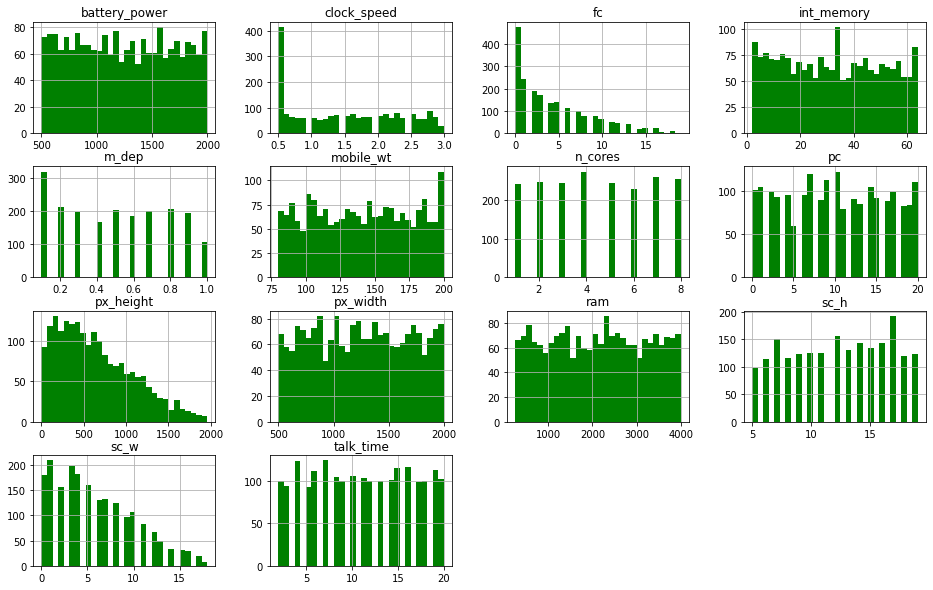

In [72]:
# plotting all columns except categorical ones.
hist_plot = df.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1)
hist_plot.hist(figsize=[16,10], bins=30,color='g')

**Now plotiing thoses independent features which are really effecting our dependent column (Prince Range).**

# **Bivariate Analysis**

Text(0.5, 1.0, 'Battery Power with Price Range')

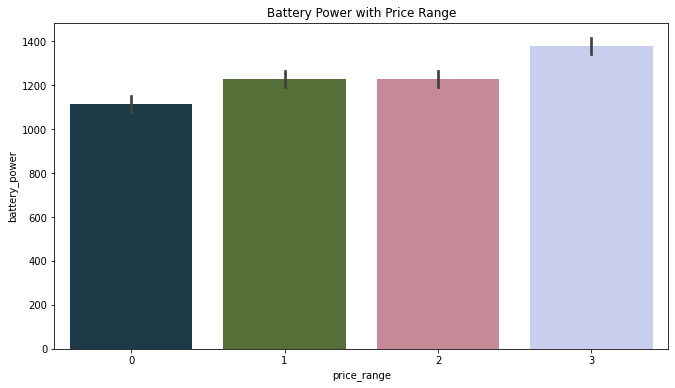

In [73]:
# battery power and price range 
plt.figure(figsize=[11, 6])
sns.barplot(data=df, y='battery_power', x='price_range', palette='cubehelix').set_title("Battery Power with Price Range")

we can see from barplot of battery against price range that more expensive the phone is higher the battery power is .

Text(0.5, 1.0, 'Int Memory with Price Range')

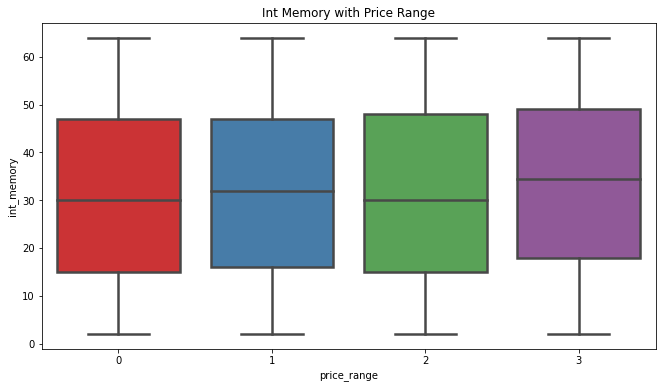

In [74]:
# Int Memory with Price Range
plt.figure(figsize=[11, 6])
sns.boxplot(data=df, y='int_memory', x='price_range', palette='Set1', linewidth=2.5).set_title("Int Memory with Price Range")

Text(0.5, 1.0, 'Pixel-height with Price Range')

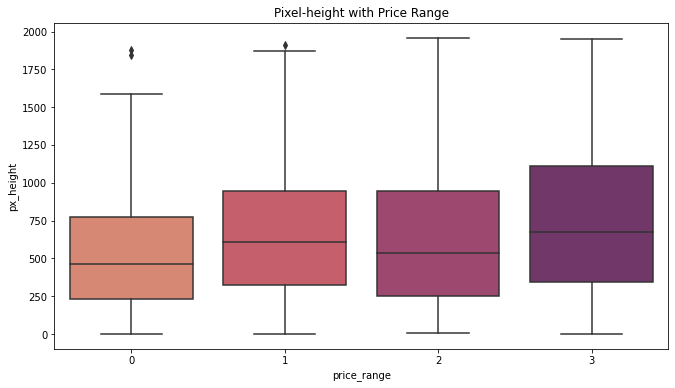

In [75]:
# Pixel-height with Price Range
plt.figure(figsize=[11, 6])
sns.boxplot(data=df, y='px_height', x='price_range', palette='flare').set_title("Pixel-height with Price Range")


it is easily observable from our bar chart that when price of mobile phone are increasing, our median value of pixel height is also increasing .

Text(0.5, 1.0, 'Pixel-width with Price Range')

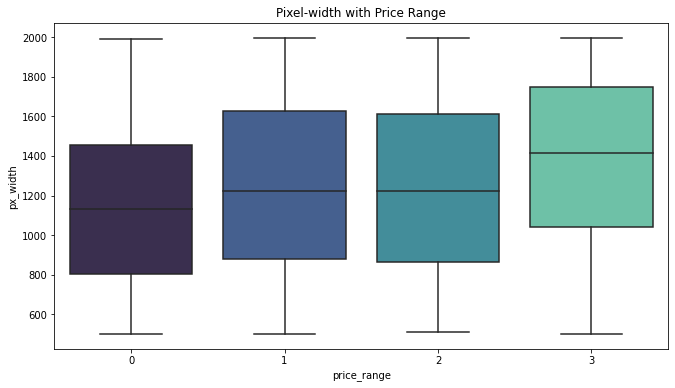

In [76]:
# Pixel-width with Price Range
plt.figure(figsize=[11, 6])
sns.boxplot(data=df, 
            y='px_width', 
            x='price_range', 
            palette='mako').set_title("Pixel-width with Price Range")

Text(0.5, 1.0, 'Ram with Price Range')

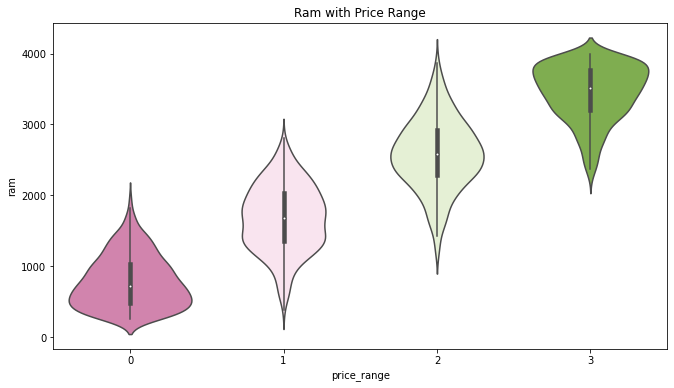

In [77]:
#Ram with Price Range
plt.figure(figsize=[11, 6])
sns.violinplot(data=df, y='ram', x='price_range', palette='PiYG').set_title("Ram with Price Range")

As observed that in expensive mobile phone pixel width is more. 
RAM is also increasing along with price range of phone.

# **Correlation & Multicollinearity**

Text(0.5, 1.0, 'Correlation Heatmap')

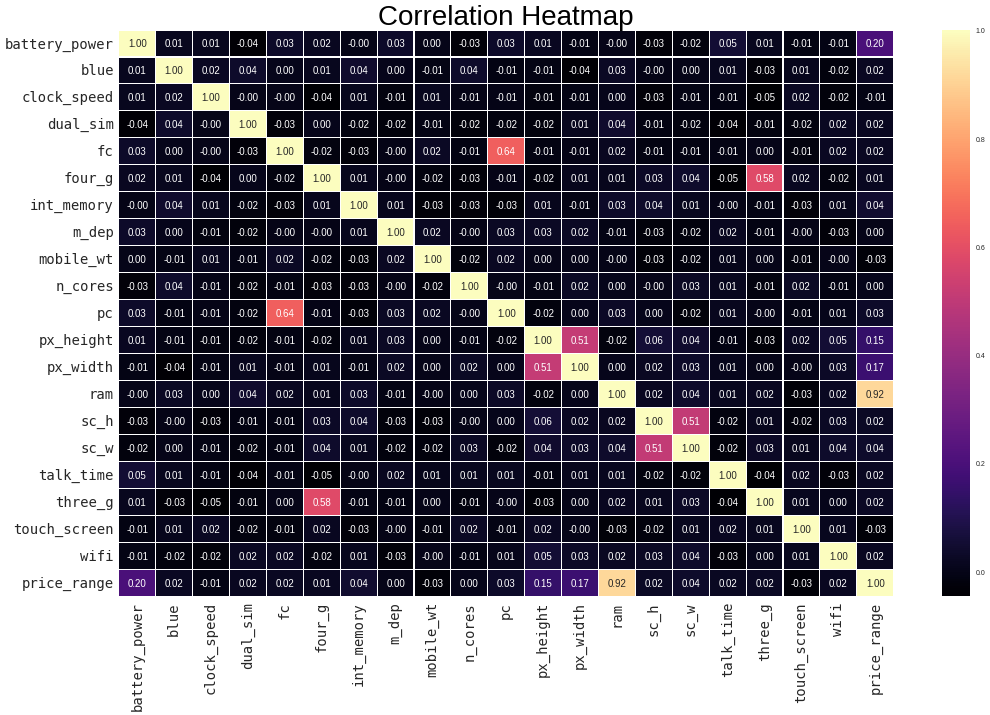

In [78]:
# checking the correlation
plt.style.use('seaborn')        
fig, ax = plt.subplots(figsize=(25,15),dpi=50)
plt.xticks(fontfamily='monospace',fontsize=20,fontweight ='normal')
plt.yticks(fontfamily='monospace',fontsize=20,fontweight ='normal')
heatmap = sns.heatmap(df.corr(),cmap='magma',annot=True,
                      annot_kws={'fontsize':14},linewidths=.1,fmt= '.2f')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40, "color": "k"})

From our heatmap , we can observe correlation between all of our feature variabes. As we can see that some of depedent features are  is highly related with each other. 

In simple word, It shows that multicolinearity exist in our dataset.

In [79]:
# checking multicolinearity with the help of Variance Inflation Factor(VIF)
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [80]:
check_vif(df)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


Many of dependent columns like 'mobile_wt' , 'px_width' , 'ram'  are showing very high value of VIF, which confirm existence of Multicolinearity in our dataset .

Now ,we can do feature selection with the help of feature importance where we got to know feature importance or contribution to final output which will help us to pick important and relevant features only. 

In [81]:
# Importing ExtraTreeClassifier library for feature selection
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
X_fs = df.iloc[: , :20]
Y_fs = df.iloc[: , 20]

In [83]:
model_fi = ExtraTreesClassifier()
model_fi.fit(X_fs,Y_fs)

ExtraTreesClassifier()

In [84]:
model_fi.feature_importances_

array([0.06157255, 0.01975527, 0.03366647, 0.02034528, 0.03232815,
       0.01757317, 0.03442409, 0.03364224, 0.03669188, 0.03293678,
       0.03341678, 0.04607138, 0.04806748, 0.39477656, 0.03384982,
       0.03339297, 0.03450631, 0.01418487, 0.01853407, 0.02026388])

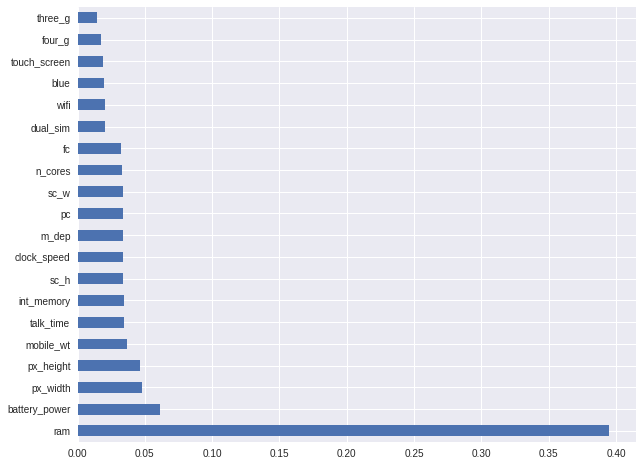

In [85]:
# first seeing fi of all 20 features

plt.figure(figsize=(10,8))
feature_importance = pd.Series(model_fi.feature_importances_, index=X_fs.columns)
feature_importance.nlargest(20).plot(kind='barh')

plt.show()


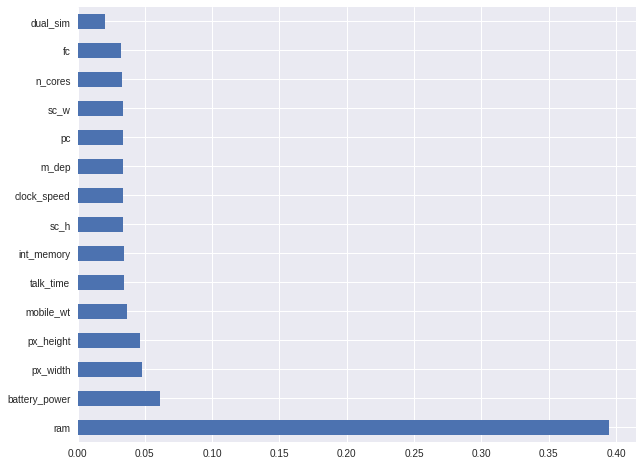

In [86]:
# now we can select 15 most influential 

plt.figure(figsize=(10,8))
feature_importance = pd.Series(model_fi.feature_importances_, index= X_fs.columns)
feature_importance.nlargest(15).plot(kind='barh')

plt.show()

In [87]:
feature_importance.nlargest(15)

ram              0.394777
battery_power    0.061573
px_width         0.048067
px_height        0.046071
mobile_wt        0.036692
talk_time        0.034506
int_memory       0.034424
sc_h             0.033850
clock_speed      0.033666
m_dep            0.033642
pc               0.033417
sc_w             0.033393
n_cores          0.032937
fc               0.032328
dual_sim         0.020345
dtype: float64

In [88]:
# dropping columns that doesn't contribute realy good to the dependant feature
df_fs = df.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen'] , axis = 1)

In [89]:
df_fs.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'wifi', 'price_range'],
      dtype='object')

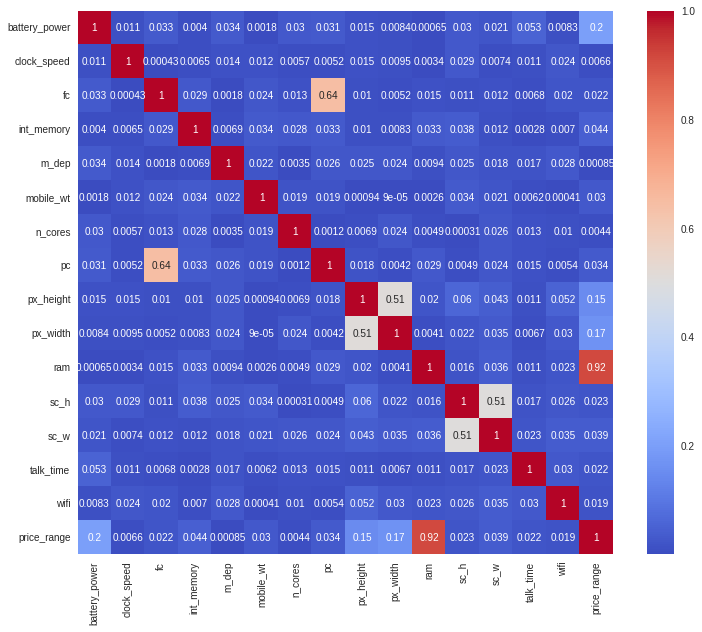

In [90]:
# now seeing this corr graphically with help of hitmap 

plt.figure(figsize=(12,10))
sns.heatmap(abs(df_fs.corr()), cmap="coolwarm", annot=True )

# **Train test split**

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_fs.drop('price_range', axis=1),
                                                    df_fs['price_range'],
                                                    test_size=0.2,
                                                    random_state=0)


In [92]:
# printing shape of train and test set
X_train.shape, X_test.shape

((1600, 15), (400, 15))

In [93]:
# printing shape of train and test set
Y_train.shape , Y_test.shape

((1600,), (400,))

In [94]:
print(Y_train.value_counts())
print(Y_test.value_counts())

1    408
0    405
2    401
3    386
Name: price_range, dtype: int64
3    114
2     99
0     95
1     92
Name: price_range, dtype: int64


**Feature scaling**
 

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [96]:
stan_col = list(X_train.columns)

In [97]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train[stan_col])
X_test_scaled = scaler.fit_transform(X_test[stan_col])


In [98]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# converting test train data in to pandas datframe to avoid getting output in numpy array
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [100]:
X_train

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,wifi
0,-0.001608,1.671035,-0.748114,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,-1.025320
1,1.374075,-1.270550,1.810037,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.025320
2,1.039205,0.690506,-0.050436,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.975305
3,-1.639756,-0.902852,0.647241,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,-1.025320
4,-0.578580,1.548469,-0.515555,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,0.975305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.019709,0.077676,1.112359,0.064432,1.733633,0.511449,-1.543255,1.348562,-0.299272,-1.609417,1.571211,-0.553859,-0.186208,0.363853,-1.025320
1596,-0.169043,-1.025418,-0.748114,-0.155612,0.693843,-0.455831,-1.103346,1.678183,-0.773314,1.233793,-0.521490,1.121782,0.724205,0.728731,0.975305
1597,-0.096639,0.567940,-0.980673,0.449508,-1.039140,-1.309313,0.216380,-1.453217,1.671033,0.887904,1.398522,0.164273,0.268999,-0.365905,0.975305
1598,-0.094376,1.058205,-0.515555,-1.035787,1.387036,0.852842,-1.543255,-0.464354,-1.069871,1.272994,-0.998708,0.403650,0.041395,-0.548344,0.975305


In [101]:
X_test

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,wifi
0,0.500697,-1.270550,-0.748114,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,-0.186208,-1.095663,-1.025320
1,-0.318377,-1.270550,1.344919,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.413811,-0.001026,-1.025320
2,0.659082,0.322808,-0.980673,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,-0.186208,0.363853,0.975305
3,1.299408,0.690506,-0.515555,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.634619,0.363853,0.975305
4,-0.331953,0.200242,-0.980673,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,-0.186208,1.093610,-1.025320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.628358,-1.270550,-0.050436,0.614541,1.387036,0.113158,0.216380,-0.299543,1.331790,0.576603,-0.623619,-0.075105,0.724205,-0.365905,0.975305
396,-0.958703,-0.902852,1.344919,-0.595700,1.387036,-1.366212,1.096197,1.513373,1.792352,1.072378,-0.770312,1.361159,0.268999,-1.460541,-1.025320
397,-1.445170,1.303337,-0.748114,-0.265634,-1.385736,1.620976,0.216380,-1.288406,-0.557636,-1.690125,-1.295809,1.121782,-0.186208,1.093610,0.975305
398,0.996215,0.077676,-0.515555,0.559530,0.000650,1.222684,0.216380,-0.629164,-0.991239,-1.341929,0.919447,-0.075105,-0.413811,1.640928,-1.025320


## **Function for the evaluation of different models**

In [102]:
# creating function to calculate metrics for evaluating the performance of models

def evaluate_model(name,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating 
  the perfomance of models
  '''
  list_of_scores=[]
  #Accuracy 
  Accuracy =  accuracy_score(y_true,y_pred)
  print(f'Accuracy : {Accuracy}')
    
  #Recall
  Recall  = recall_score(y_true,y_pred,average='weighted')
  print(f"Recall : {Recall}")

  #precision
  Precision = precision_score(y_true,y_pred,average='weighted')
  print(f"Precision : {Precision}")
 
  #f1 score
  F1 = f1_score(y_true,y_pred,average='weighted')
  print(f"F1 : {F1}")

  list_of_scores.extend([Accuracy,Recall,Precision,F1])
  return(list_of_scores)

In [103]:
# creating function to calculate and plot confusion metrics for evaluating the performance of models
def test_confusion_metric(x):
  '''
  This function calculate  confusion metrics for evaluating 
  the perfomance of models
  '''
  plt.figure(figsize=(8,5))
  
  # defining label for x and y ticklables
  labels = ['Low', 'Medium','High','Premium']   
  ax= plt.subplot()
  sns.heatmap(x, annot=True, ax = ax) 

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')     # defining label for x-axis
  ax.set_ylabel('True labels')          # defining label for y-axis
  ax.set_title('Confusion Matrix')      # heatmap title
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

## **Naive Bayes**

In [104]:
# importing naive bayes and fitting data in model
from sklearn.naive_bayes import GaussianNB
NB1 = GaussianNB()
NB1.fit(X_train, Y_train)

GaussianNB()

In [105]:
# prediction Y for training and test set
y_train_pred_gnb = NB1.predict(X_train)
y__test_pred_gnb = NB1.predict(X_test)

In [106]:
print(f"Evaluation metrices on the train data")
# calling score metrics function
evaluate_model(GaussianNB,Y_train,y_train_pred_gnb)

Evaluation metrices on the train data
Accuracy : 0.816875
Recall : 0.816875
Precision : 0.8177958342933045
F1 : 0.817203795640038


[0.816875, 0.816875, 0.8177958342933045, 0.817203795640038]

In [107]:
print(f"Evaluation metrices on the test data")
# calling score metrics function
evaluate_model(GaussianNB,Y_test,y__test_pred_gnb)

Evaluation metrices on the test data
Accuracy : 0.825
Recall : 0.825
Precision : 0.8239428786535121
F1 : 0.8242390777915095


[0.825, 0.825, 0.8239428786535121, 0.8242390777915095]

**Confusion Metric- Gaussian Naive Bayes**

[[ 89   6   0   0]
 [  4  68  20   0]
 [  0  16  68  15]
 [  0   0   9 105]]


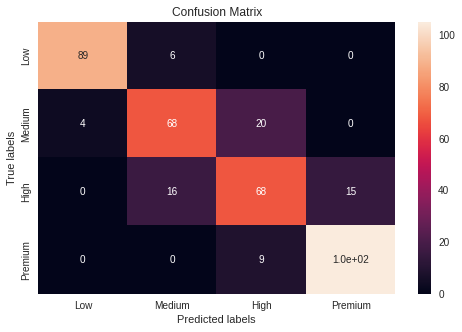

In [108]:
cm = confusion_matrix(Y_test,y__test_pred_gnb)
print(cm)
test_confusion_metric(cm)

# **Decision Tree**

In [109]:
# storing our model in a object - dt
dt = DecisionTreeClassifier()

In [110]:
# fitting data in our model 
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [111]:
# model prediction for traina and test set
dt_pred1 = dt.predict(X_train)
dt_pred2 = dt.predict(X_test)

In [112]:
# accuracy score
print("Model - Decision Tree")
train_accuracy = accuracy_score(dt_pred1,Y_train)
print(f"Accuracy score for train data is", train_accuracy)
test_accuracy = accuracy_score(dt_pred2,Y_test)
print(f"Accuracy score for test data is", test_accuracy)

Model - Decision Tree
Accuracy score for train data is 1.0
Accuracy score for test data is 0.8525


**As expected, this  model is overfitted. Lets building this model with cross validation and hyper parameter tunning.**

In [113]:
# defining parameter for decision tree model
parameters={"max_depth" : [1,2,3,5,7,9,11,12,15,20,25,50,100],
           "min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],
           "max_leaf_nodes":[None,10,20,30,40,50,70,100,140,150]}

In [114]:
# building decision tree model with cross validation and hyper parameter tunning
class_dt_model = DecisionTreeClassifier()
tuning_dt = RandomizedSearchCV(class_dt_model,param_distributions= parameters,scoring='neg_mean_squared_error',cv=4)
tuning_dt.fit(X_train, Y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 5, 7, 9, 11, 12,
                                                      15, 20, 25, 50, 100],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 70, 100, 140,
                                                           150],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10,
                                                             15, 20, 40, 60, 80,
                                                             100]},
                   scoring='neg_mean_squared_error')

In [115]:
# best parameters
tuning_dt.best_params_

{'min_samples_leaf': 5, 'max_leaf_nodes': 40, 'max_depth': 12}

In [116]:
# prediction for training and test set
dt_tune_y_pred1 = tuning_dt.predict(X_train)
dt_tune_y_pred2 = tuning_dt.predict(X_test)

In [117]:
print(f"Evaluation metrices on the train data")
# calling score metrics function
evaluate_model(DecisionTreeClassifier,Y_train,dt_tune_y_pred1)

Evaluation metrices on the train data
Accuracy : 0.92375
Recall : 0.92375
Precision : 0.9238077950066024
F1 : 0.9233379117092259


[0.92375, 0.92375, 0.9238077950066024, 0.9233379117092259]

In [118]:
print(f"Evaluation metrices on the test data")
# calling score metrics function
evaluate_model(DecisionTreeClassifier,Y_test,dt_tune_y_pred2)

Evaluation metrices on the test data
Accuracy : 0.86
Recall : 0.86
Precision : 0.8605256660847498
F1 : 0.8599938167206868


[0.86, 0.86, 0.8605256660847498, 0.8599938167206868]

**Confusion Metric- Decision Tree**

[[ 86   9   0   0]
 [  6  73  13   0]
 [  0   6  80  13]
 [  0   0   9 105]]


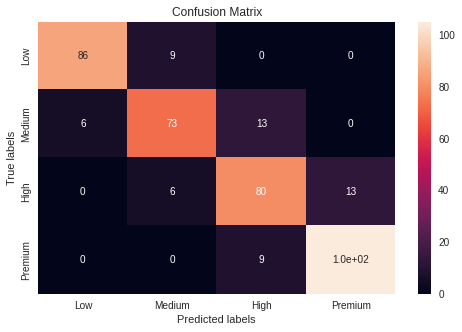

In [119]:
cm = confusion_matrix(Y_test,dt_tune_y_pred2)
print(cm)
test_confusion_metric(cm)

## **Random forest**

In [120]:
# creating object for model: random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [121]:
# prediction for training and test set
rf_y_pred1 = rf.predict(X_train)
rf_y_pred2 = rf.predict(X_test)

In [122]:
# accuracy score
print("Model: Random forest")
train_accuracy1 = accuracy_score(rf_y_pred1,Y_train)
print(f"Accuracy score for train data is", train_accuracy)
test_accuracy2 = accuracy_score(rf_y_pred2,Y_test)
print(f"Accuracy score for test data is", test_accuracy)

Model: Random forest
Accuracy score for train data is 1.0
Accuracy score for test data is 0.8525


**Cross Validation**

In [123]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(), X_train, Y_train, cv = 10, scoring = "accuracy"))

0.8775000000000001

Lets building this model with cross validation and hyper parameter tunning using GridSearchCV.



In [124]:
# creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[60,80]
max_features = [0.2, 0.5, 0.8 ]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes, "max_features" : max_features }

In [125]:
# defining random forest model with hyperparameter tuning
rf_grid= GridSearchCV(rf,param_grid=params,verbose=0, n_jobs = -1)

In [126]:
# prediction for training and test set
rf_tune_pred1 = tuning_dt.predict(X_train)
rf_tune_pred2 = tuning_dt.predict(X_test)

In [127]:
print(f"Evaluation metrices on the train data")
# calling score metrics function
evaluate_model(RandomForestClassifier,Y_train,rf_tune_pred1)

Evaluation metrices on the train data
Accuracy : 0.92375
Recall : 0.92375
Precision : 0.9238077950066024
F1 : 0.9233379117092259


[0.92375, 0.92375, 0.9238077950066024, 0.9233379117092259]

In [128]:
print(f"Evaluation metrices on the test data")
# calling score metrics function
evaluate_model(RandomForestClassifier,Y_test,rf_tune_pred2)

Evaluation metrices on the test data
Accuracy : 0.86
Recall : 0.86
Precision : 0.8605256660847498
F1 : 0.8599938167206868


[0.86, 0.86, 0.8605256660847498, 0.8599938167206868]

**Confusion Metric- Random Forest**

[[ 86   9   0   0]
 [  6  73  13   0]
 [  0   6  80  13]
 [  0   0   9 105]]


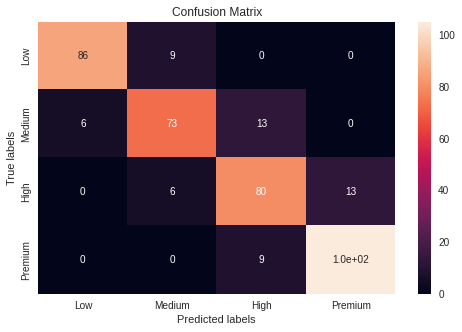

In [129]:
cm = confusion_matrix(Y_test,rf_tune_pred2)
print(cm)
test_confusion_metric(cm)

# **KNN**

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [131]:
knn_y_pred_train = knn.predict(X_train)   # Prediction for train dataset
knn_y_pred_test = knn.predict(X_test)     # Predictionfor test dataset

In [132]:
print(f"Evaluation metrices on the train data")
# calling score metrics function
evaluate_model(KNeighborsClassifier,Y_train,knn_y_pred_train)

Evaluation metrices on the train data
Accuracy : 0.74125
Recall : 0.74125
Precision : 0.7485684778157017
F1 : 0.7426884829432191


[0.74125, 0.74125, 0.7485684778157017, 0.7426884829432191]

In [133]:
print(f"Evaluation metrices on the test data")
# calling score metrics function
evaluate_model(KNeighborsClassifier,Y_test,knn_y_pred_test)

Evaluation metrices on the test data
Accuracy : 0.6
Recall : 0.6
Precision : 0.637541406682888
F1 : 0.6096435157238129


[0.6, 0.6, 0.637541406682888, 0.6096435157238129]

**Confusion Metric- KNN**

[[72 20  3  0]
 [22 47 23  0]
 [ 1 33 54 11]
 [ 0  3 44 67]]


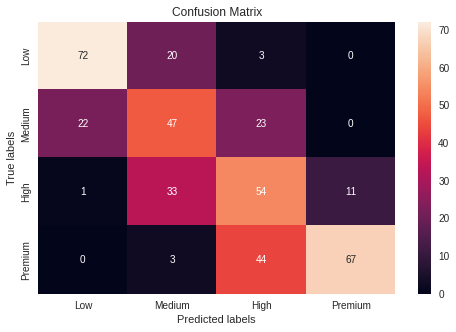

In [134]:
cm = confusion_matrix(Y_test,knn_y_pred_test)
print(cm)
test_confusion_metric(cm)

# **Logistic Regression**

In [135]:
# storing object for logistic regression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [136]:
lr_y_pred_train = lr.predict(X_train)   # Prediction for train dataset
lr_y_pred_test = lr.predict(X_test)     # Predictionfor test dataset

In [137]:
print(f"Evaluation metrices on the train data")
# calling score metrics function
evaluate_model(LogisticRegression,Y_train,lr_y_pred_train)

Evaluation metrices on the train data
Accuracy : 0.980625
Recall : 0.980625
Precision : 0.980594030597583
F1 : 0.9805949122807823


[0.980625, 0.980625, 0.980594030597583, 0.9805949122807823]

In [138]:
print(f"Evaluation metrices on the test data")
# calling score metrics function
evaluate_model(LogisticRegression,Y_test,lr_y_pred_test)

Evaluation metrices on the test data
Accuracy : 0.965
Recall : 0.965
Precision : 0.9650057471264368
F1 : 0.9649553272814143


[0.965, 0.965, 0.9650057471264368, 0.9649553272814143]

**Confusion Metric- Logistic**

[[ 93   2   0   0]
 [  2  87   3   0]
 [  0   1  94   4]
 [  0   0   2 112]]


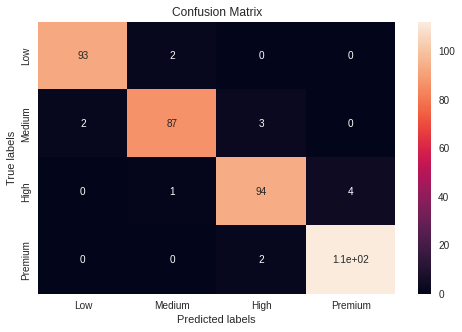

In [139]:
cm = confusion_matrix(Y_test,lr_y_pred_test)
print(cm)
test_confusion_metric(cm)

# **XG Boost**

In [140]:
# Importing required libraries
from xgboost import XGBClassifier
import xgboost as xgb

In [141]:
# Number of trees
n_estimators = [200,250.280]

# Maximum depth of trees
max_depth = [6,8,10]

# Child weight
min_child_weight= [4, 6, 8, 10]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict

{'n_estimators': [200, 250.28],
 'max_depth': [6, 8, 10],
 'min_child_weight': [4, 6, 8, 10]}

In [142]:
XGB = xgb.XGBClassifier()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB,
                       param_grid = param_dict,
                       cv = 2, verbose=2, n_jobs=-1, scoring = 'r2' )
XGB_grid.fit(X_train, Y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10],
                         'min_child_weight': [4, 6, 8, 10],
                         'n_estimators': [200, 250.28]},
             scoring='r2', verbose=2)

In [143]:
XGB_grid.best_score_

0.9071401580085627

In [144]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 200}

In [145]:
# best parameter
XGB_optimal_model = XGB_grid.best_estimator_
XGB_optimal_model

XGBClassifier(max_depth=6, min_child_weight=4, n_estimators=200,
              objective='multi:softprob')

In [146]:
XGB_y_pred_train = XGB_optimal_model.predict(X_train)   # Prediction for train dataset
XGB_y_pred_test = XGB_optimal_model.predict(X_test)     # Predictionfor test dataset

In [147]:
print(f"Evaluation metrices on the train data")
# calling score metrics function
XGB_train = evaluate_model(XGBClassifier,Y_train,XGB_y_pred_train)
print(XGB_train)

Evaluation metrices on the train data
Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 : 1.0
[1.0, 1.0, 1.0, 1.0]


In [148]:
print(f"Evaluation metrices on the test data")
# calling score metrics function
XGB_test = evaluate_model(XGBClassifier,Y_test,XGB_y_pred_test)
print(XGB_test)

Evaluation metrices on the test data
Accuracy : 0.93
Recall : 0.93
Precision : 0.9300236392688487
F1 : 0.9299368559017597
[0.93, 0.93, 0.9300236392688487, 0.9299368559017597]


**Confusion Metric- XG Boost**

[[ 94   1   0   0]
 [  2  83   7   0]
 [  0   5  87   7]
 [  0   0   6 108]]


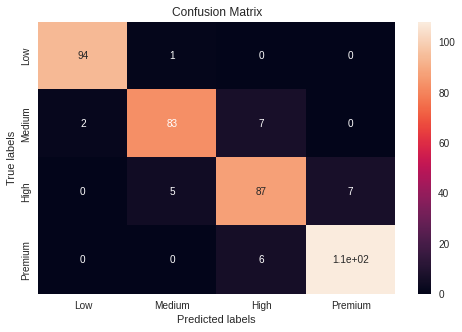

In [149]:
cm = confusion_matrix(Y_test,XGB_y_pred_test)
print(cm)
test_confusion_metric(cm)

# **Metrics for evaluation of classifier model performance**

In [150]:
# accuracy score for different models
train_score_dict =  {'GNB' : round(accuracy_score(y_train_pred_gnb, Y_train),2), 
              'KNN' : round(accuracy_score(Y_train,knn_y_pred_train),2), 
              'DT' : round(accuracy_score(Y_train,dt_tune_y_pred1),2), 
              'RM' : round(accuracy_score(Y_train,rf_tune_pred1),2),
              'LR' : round(accuracy_score(Y_train,lr_y_pred_train),2),
              'XG' : round(accuracy_score(Y_train,XGB_y_pred_train),2)              }

dict1 =pd.DataFrame(train_score_dict,index=[1])

test_score_dict = {'GNB' : round(accuracy_score(y__test_pred_gnb, Y_test),2), 
              'KNN' : round(accuracy_score(Y_test,knn_y_pred_test),2), 
              'DT' : round(accuracy_score(Y_test,dt_tune_y_pred2),2), 
              'RM' : round(accuracy_score(Y_test,rf_tune_pred2),2),
              'LR' : round(accuracy_score(Y_test,lr_y_pred_test),2),
              'XG' : round(accuracy_score(Y_test,XGB_y_pred_test),2)              }

dict2 =pd.DataFrame(test_score_dict,index=[1])

print(f"Concated accuracy score")
Acc_sco=pd.concat([dict1,dict2],keys=['Training set','Test set'])
Acc_sco

Concated accuracy score


,,GNB,KNN,DT,RM,LR,XG
Training set,1,0.82,0.74,0.92,0.92,0.98,1.00
Test set,1,0.82,0.60,0.86,0.86,0.96,0.93


In [151]:
# evalauation score for all the model

dict1_gnb =  {'Model' : 'GNB', 
              'Accuracy Score' : round(accuracy_score(Y_train,y_train_pred_gnb),2), 
              'Recall' : round(recall_score(Y_train,y_train_pred_gnb,average='weighted'),2), 
              'Precision' : round(precision_score(Y_train,y_train_pred_gnb,average='weighted'),2),
              'F1' : round(f1_score(Y_train,y_train_pred_gnb,average='weighted'),2)
              }
training_df=pd.DataFrame(dict1_gnb,index=[1])


dict2_gnb =  {'Model' : 'GNB', 
              'Accuracy Score' : round(accuracy_score(Y_test, y__test_pred_gnb),2), 
              'Recall' : round(recall_score(Y_test, y__test_pred_gnb,average='weighted'),2), 
              'Precision' : round(precision_score(Y_test, y__test_pred_gnb,average='weighted'),2),
              'F1' : round(f1_score(Y_test, y__test_pred_gnb,average='weighted'),2)
              }

test_df=pd.DataFrame(dict2_gnb,index=[1])


dict1_knn =  {'Model' : 'KNN', 
              'Accuracy Score' : round(accuracy_score(Y_train,knn_y_pred_train),2), 
              'Recall' : round(recall_score(Y_train,knn_y_pred_train,average='weighted'),2), 
              'Precision' : round(precision_score(Y_train,knn_y_pred_train,average='weighted'),2),
              'F1' : round(f1_score(Y_train,knn_y_pred_train,average='weighted'),2)
              }
training_df=training_df.append(dict1_knn,ignore_index=True)


dict2_knn =  {'Model' : 'KNN', 
              'Accuracy Score' : round(accuracy_score(Y_test, knn_y_pred_test),2), 
              'Recall' : round(recall_score(Y_test, knn_y_pred_test,average='weighted'),2), 
              'Precision' : round(precision_score(Y_test, knn_y_pred_test,average='weighted'),2),
              'F1' : round(f1_score(Y_test, knn_y_pred_test,average='weighted'),2)
              }

test_df=test_df.append(dict2_knn,ignore_index=True)


dict1_dt =  {'Model' : 'Decision tree', 
              'Accuracy Score' : round(accuracy_score(Y_train,dt_tune_y_pred1),2), 
              'Recall' : round(recall_score(Y_train,dt_tune_y_pred1,average='weighted'),2), 
              'Precision' : round(precision_score(Y_train,dt_tune_y_pred1,average='weighted'),2),
              'F1' : round(f1_score(Y_train,dt_tune_y_pred1,average='weighted'),2)
              }
training_df=training_df.append(dict1_dt,ignore_index=True)


dict2_dt =  {'Model' : 'Decision tree', 
              'Accuracy Score' : round(accuracy_score(Y_test, dt_tune_y_pred2),2), 
              'Recall' : round(recall_score(Y_test, dt_tune_y_pred2,average='weighted'),2), 
              'Precision' : round(precision_score(Y_test, dt_tune_y_pred2,average='weighted'),2),
              'F1' : round(f1_score(Y_test, dt_tune_y_pred2,average='weighted'),2)
              }

test_df=test_df.append(dict2_dt,ignore_index=True)


dict1_rf =  {'Model' : 'Random Forest', 
              'Accuracy Score' : round(accuracy_score(Y_train,rf_tune_pred1),2), 
              'Recall' : round(recall_score(Y_train,rf_tune_pred1,average='weighted'),2), 
              'Precision' : round(precision_score(Y_train,rf_tune_pred1,average='weighted'),2),
              'F1' : round(f1_score(Y_train,rf_tune_pred1,average='weighted'),2)
              }
training_df=training_df.append(dict1_rf,ignore_index=True)


dict2_rf =  {'Model' : 'Random Forest', 
              'Accuracy Score' : round(accuracy_score(Y_test, rf_tune_pred2),2), 
              'Recall' : round(recall_score(Y_test, rf_tune_pred2,average='weighted'),2), 
              'Precision' : round(precision_score(Y_test, rf_tune_pred2,average='weighted'),2),
              'F1' : round(f1_score(Y_test, rf_tune_pred2,average='weighted'),2)
              }

test_df=test_df.append(dict2_rf,ignore_index=True)


dict1_lr =  {'Model' : 'Logistic Regression', 
              'Accuracy Score' : round(accuracy_score(Y_train,lr_y_pred_train),2), 
              'Recall' : round(recall_score(Y_train,lr_y_pred_train,average='weighted'),2), 
              'Precision' : round(precision_score(Y_train,lr_y_pred_train,average='weighted'),2),
              'F1' : round(f1_score(Y_train,lr_y_pred_train,average='weighted'),2)
              }
training_df=training_df.append(dict1_lr,ignore_index=True)


dict2_lr =  {'Model' : 'Logistic Regression', 
              'Accuracy Score' : round(accuracy_score(Y_test, lr_y_pred_test),2), 
              'Recall' : round(recall_score(Y_test, lr_y_pred_test,average='weighted'),2), 
              'Precision' : round(precision_score(Y_test, lr_y_pred_test,average='weighted'),2),
              'F1' : round(f1_score(Y_test, lr_y_pred_test, average='weighted'),2)
              }

test_df=test_df.append(dict2_lr,ignore_index=True)


dict1_xg =  {'Model' : 'XG Boost', 
              'Accuracy Score' : round(accuracy_score(Y_train,XGB_y_pred_train),2), 
              'Recall' : round(recall_score(Y_train,XGB_y_pred_train,average='weighted'),2), 
              'Precision' : round(precision_score(Y_train,XGB_y_pred_train,average='weighted'),2),
              'F1' : round(f1_score(Y_train,XGB_y_pred_train,average='weighted'),2)
              }
training_df=training_df.append(dict1_xg,ignore_index=True)


dict2_xg =  {'Model' : 'XG Boost', 
              'Accuracy Score' : round(accuracy_score(Y_test, XGB_y_pred_test),2), 
              'Recall' : round(recall_score(Y_test, XGB_y_pred_test,average='weighted'),2), 
              'Precision' : round(precision_score(Y_test, XGB_y_pred_test,average='weighted'),2),
              'F1' : round(f1_score(Y_test, XGB_y_pred_test,average='weighted'),2)
              }

test_df=test_df.append(dict2_xg,ignore_index=True)

result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model  Accuracy Score  Recall  Precision    F1
Training set 0                  GNB            0.82    0.82       0.82  0.82
             1                  KNN            0.74    0.74       0.75  0.74
             2        Decision tree            0.92    0.92       0.92  0.92
             3        Random Forest            0.92    0.92       0.92  0.92
             4  Logistic Regression            0.98    0.98       0.98  0.98
             5             XG Boost            1.00    1.00       1.00  1.00
Test set     0                  GNB            0.82    0.82       0.82  0.82
             1                  KNN            0.60    0.60       0.64  0.61
             2        Decision tree            0.86    0.86       0.86  0.86
             3        Random Forest            0.86    0.86       0.86  0.86
             4  Logistic Regression            0.96    0.96       0.97  0.96
             5             XG Boost            0.93    0.93       0.93  0.93

# **Observation**

Different features like Battery power, clock speed, dual sim, mobile depth, mobile weight, pixel height, pixel width, ram, secondary camera, talk time got linear relationship with our dependent variable price range. 

It was seen that ram has the highest impact on the price of the mobile. Surprisingly, Logistic regression performed well in this classification problem. 

It was also found that there's some over fitting in case of XG Boost. 

Also, Random Forest and Decision Tree models were tested which performed well as compared to the other models like KNN and Naive Bayes.

# **Conclusion**

Most of the models are not able to get good accuracy for each class of target variable. 

With hyper parameter tuning, even after assigning different parameters values XG boost performed not so good on test data but It works really well on training set. It was seen that ram has the highest impact on the price of the mobile. 

Surprisingly, Logistic regression performed well in this classification problem. It was also found that there's some over fitting in case of XG Boost. Random Forest and Decision Tree models were tested which performed well as compared to the other 2 models like KNN and Naive Bayes.

Overall Logistic regression is the model that performed best among all.


